## Principal Component Analysis

using Boston dataset

In [96]:
#import libraries

import pandas as pd
import numpy as np

from sklearn  import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD

from matplotlib import pyplot as plt

In [13]:
#load the dataset

from sklearn.datasets import load_boston
boston = load_boston()

x =  pd.DataFrame(boston.data,columns=boston.feature_names)
y =  pd.DataFrame(boston.target)
print(x.head(2)) # data without target variable
print("\n")
print(y.head(2)) # only target variable

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  


      0
0  24.0
1  21.6


In [24]:
print(boston['DESCR']) # 13 features

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [17]:
# linear regresion
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state = 4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
reg.score(x_test,y_test)
# 76% accuracte with all the features as input

0.763474108448326

# Use PCA to improve the model

In [25]:
x.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [47]:
# lets reduce the dimension from 13 to 10
pca = PCA(n_components=10,whiten='True')
x1 = pca.fit(x).transform(x)
x1

array([[-0.68173764, -0.07033667, -0.1109011 , ...,  1.77385871,
        -1.06999262, -0.30352406],
       [-0.96094425,  0.12793279, -1.07602204, ...,  0.29581314,
         0.25838559,  1.19559087],
       [-0.96334291,  0.17807728, -0.58564662, ...,  0.16215834,
         0.22912732,  0.83704661],
       ...,
       [-0.78738799,  0.01185018, -1.30335107, ...,  0.19112326,
         2.00493167, -1.24284195],
       [-0.78236981,  0.05376511, -1.25801946, ...,  0.19778084,
         1.98428552, -1.09494298],
       [-0.79195785,  0.01274787, -1.04073278, ...,  0.15812036,
         1.84858247, -1.18929104]])

In [48]:
# linear regresion
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test =  train_test_split(x1,y,test_size=0.2,random_state = 4)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
reg.score(x_test,y_test)
# 69% accuracte with all the features as inputracy goes down futher as we reduce the number of features

# data is lost and the accu

0.6901837869213895

### SVD - Singular value decomposition

In [50]:
svd = TruncatedSVD(n_components=10)
x2 = svd.fit(x).transform(x)
# linear regresion
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test =  train_test_split(x2,y,test_size=0.2,random_state = 4)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

# 68% accuracte with all the features as inputracy goes down futher as we reduce the number of features

0.6822325020984261

In [51]:
x.corr() 
# difference in the covariance is very less and so PCA could not make more difference

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [52]:
# new dataset


In [57]:
data = pd.read_csv('C:/Users/Anne 1/Desktop/Dimensionality_Reduction/PCA/data/mnist.csv')

data.head()
# 785 columns or features

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# split the dependent and independent features seperat

df_x = data.iloc[:,1:]# only data
df_y = data.iloc[:,0] # only the target values



In [68]:
x_train,x_test,y_train,y_test =  train_test_split(df_x,df_y,test_size=0.2,random_state = 4)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
pred = rf.predict(x_test)
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [76]:
# compare the predicted output with the actual output/target
s = y_test.values
count = 0

for i in range(len(pred)):
    if(pred[i]==s[i]):
        count = count + 1

In [77]:
# get the accuracy
count /float(len(pred))

# 96.7 % accuracy with all features

0.9671666666666666

In [78]:
# lets reduce the dimension from 785  to 10
pca = PCA(n_components=10,whiten='True')
x1 = pca.fit(df_x).transform(df_x)
x1

array([[ 0.21485379, -0.63392139, -0.05330307, ...,  0.5082221 ,
        -1.18126893,  0.69821072],
       [ 1.7539497 , -0.59779856,  1.29667441, ..., -0.33385189,
         0.13140535,  0.53116363],
       [-0.08988827,  0.79509884, -0.40989312, ...,  1.17202478,
        -0.37225668, -0.62796326],
       ...,
       [-0.30867957,  0.32454555, -0.56015155, ..., -0.58769737,
        -0.28437882,  0.94352175],
       [ 0.22642317, -0.01133715,  1.11732821, ...,  0.44767015,
        -0.05357365, -0.33027395],
       [-0.30067455, -0.05011552,  1.20900192, ..., -0.49138625,
         0.28357674, -0.42423889]])

In [79]:
x_train,x_test,y_train,y_test =  train_test_split(x1,df_y,test_size=0.2,random_state = 4)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
pred = rf.predict(x_test)
pred

# compare the predicted output with the actual output/target
s = y_test.values
count = 0

for i in range(len(pred)):
    if(pred[i]==s[i]):
        count = count + 1
        
# get the accuracy
count /float(len(pred))

# 91.02 % accuracy with 10 features

0.91025

In [85]:
# lets reduce the dimension from 785  to 25
pca = PCA(n_components=25,whiten='True')
x2 = pca.fit(df_x).transform(df_x)
x_train,x_test,y_train,y_test =  train_test_split(x2,df_y,test_size=0.2,random_state = 4)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

pred = rf.predict(x_test)
pred

# compare the predicted output with the actual output/target
s = y_test.values
count = 0

for i in range(len(pred)):
    if(pred[i]==s[i]):
        count = count + 1
        
# get the accuracy
count /float(len(pred))

# 94.85 % accuracy with 10 features with 5% loss

0.9489166666666666

In [86]:
# lets reduce the dimension from 785  to 2 for better visualization
pca = PCA(n_components=2,whiten='True')
x2 = pca.fit(df_x).transform(df_x)
x_train,x_test,y_train,y_test =  train_test_split(x2,df_y,test_size=0.2,random_state = 4)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

pred = rf.predict(x_test)
pred

# compare the predicted output with the actual output/target
s = y_test.values
count = 0

for i in range(len(pred)):
    if(pred[i]==s[i]):
        count = count + 1
        
# get the accuracy
count /float(len(pred))

## accuracy is very poor


0.42233333333333334

In [93]:
#library for plot
from matplotlib import pyplot as plt

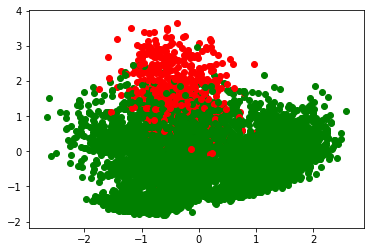

In [95]:
#Visualization , red for 0 and green 1

y = df_y.values

# plot only for 5000 records
for i in range(5000):
    if y[i] == 0:
        plt.scatter(x2[i,1],x2[i,0],c='r')
    else:
        plt.scatter(x2[i,1],x2[i,0],c='g')
        
plt.show()

In [ ]:
# Data cannot be seperated using lower dimension but by higher dim